# K-Means Clustering
Iteratively clusters a data set into K clusters based on the mean of each data point in each centroid.

# K-Means Algorithm
- Step 1: Choose the number of K clusters
- Step 2: Select at random K points
    - These points will be the centroids of your clusters
    - These centroids don't have to be apart of the data set
- Step 3: Assign each data point to the closest centroid
    - This step creates K clusters
    - Use the Euclidean Distance (distance formula) to determine closest centroid
- Step 4: Compute and place the new centroid of each cluster
- Step 5: Reassign each data point to the closest centroid
    - If any reassignment took place, go to Step 4
    - If no reassignment took place, your model is ready

### K-Means Algorithm Visualization
#### Here's the data set:
<img src="images/kmc/choose_k_k_means_example.png" height="35%" width="35%"></img>

#### We choose the number of K clusters as K = 2
<img src="images/kmc/first_iteration_k_means_example.png" height="35%" width="35%"></img>
- First iteration

As seen above, two centroids were randomly created because K = 2.  
Then, the closest data points to those centroids were assigned.

#### Determine new centroid of each cluster, re-assign each data point
We need to find the "center of gravity" of each cluster, and this "center of gravity" is where each centroid will be placed.

The following diagram shows the new centroid positions and the re-assignment of the data points:

<img src="images/kmc/new_centroid_1_k_means_example.png" height="35%" width="35%"></img>
- Second iteration

#### Repeat process of determining centroids
Keep repeating the centroid placement process until there is no reassignment of data points.

#### Model is ready
After iterating (repeating) centroid placements, we determined a model where no new reassignment took place when we last placed the centroids. This model became the final model for the data set.

<img src="images/kmc/ready_model_k_means_example.png" height="35%" width="35%"></img>

# K-Means Random Initialization Trap
Sometimes, based on where the initial centroids were placed, it can really determine the outcome of clusters.

For instance, in the same data set, based on the placement of the initial clusters these two different results were created.

#### K-Means result 1
<img src="images/kmc/true_cluster_k_means_example.png" height="35%" width="35%"></img>
- The diagram above is the more correct clustering of the data set

####  K-Means result 2
<img src="images/kmc/false_cluster_k_means_example.png" height="35%" width="35%"></img>
- The diagram above is the less correct clustering of the data set

### How To Prevent Trap!
There is a solution, which is called the K-Means++ that allows the program to correctly select the initial centroids.

As it turns out, good initial centroids are ones that aren't close to each other. The K-Means++ algorithm selects initial means that aren't close to each other, then uses the standard K-Means algorithm for clustering.
- https://msdn.microsoft.com/en-us/magazine/mt185575.aspx

Fortunately, SKLearn implements the K-Means++ algorithm as a default.

# Choosing The Best Number of K Clusters
There's an algorithm to find the best number of K clusters for a data set.
- We need to evaluate how a K-value cluster performs compared to another K-value clusters

The "Within Clusters Sum of Squares" (WCSS) is a metric used to sum of the distance of each point then squaring that distance within each cluster. Then you add-up all the sum of squares.

### WCSS for K = 1 Example
<img src="images/kmc/wcss_k_1.png" height="75%" width="75%"></img>
- "Pi in Cluster 1" refers to each point within Cluster 1

As seen, the squared distance of each point to the centroid is very far.
- In fact, this would create the largest WCSS value

### WCSS For K = 3 Example
<img src="images/kmc/wcss_k_3.png" height="75%" width="75%"></img>
- "Pi in Cluster 1" refers to each point within Cluster 1
- "Pi in Cluster 2" refers to each point within Cluster 2
- "Pi in Cluster 3" refers to each point within Cluster 3

As seen, the squared distance of each point to the centroid is shorter than when K = 1.  
- The WCSS value would be less than when K = 1

### The Elbow Method
How do we find the optimal goodness of K?

If we graph WCSS versus Number of Clusters:

<img src="images/kmc/wcss_graph.png" height="75%" width="75%"></img>
- K = 3 is the optimal number of clusters

The optimal number of clusters is the point in the graph in-between huge and small changes of the WCSS-value.
- This point is referred to the "elbow" point

In [13]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# import the mall data set using pandas
mall_df = pd.read_csv("datasets/mall_customers.csv")

mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
# the independent variables are the Annual Income and Spending Score
x = mall_df.iloc[:, [3, 4]].values

# Elbow Method
Let's determine the optimal number of clusters using the elbow method.

Based on the visualization below, we can determine the best value for K is when K = 5.

In [16]:
# import the k means class
from sklearn.cluster import KMeans

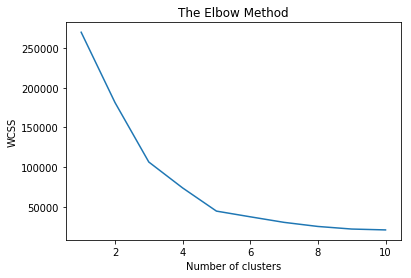

In [17]:
wcss = []

# loop 10 times to test k = 1 to k = 10
for k in range(1, 11):
    """
    Run a KMeans algorithm per the value of k.
    - n_clusters is the number of clusters
    - init is the initialization method
    - max_iter is the maximum number of iterations to place centroids and reassign clusters
    - n_init is the number of times the algorithm is run with different initial centroids
    - random_state is the state's seed
    """
    k_means = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10, random_state=0)
    k_means.fit(x)
    
    # another term for WCSS is "intertia", which is a property within the k means model
    wcss.append(k_means.inertia_)
    
# plot the WCSS vs Number of Iterations
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# K-Means Model
Now that we know K = 5 is the best model using the Elbow method, let's model it.

In [18]:
# create a k means model using the parameters from the elbow method model, but with k =5
k_means = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)

In [19]:
# fit and predict the clusterings of the data set x
y_kmeans = k_means.fit_predict(x)

# notice how it classified each data point to a cluster using 5 clusters total
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

# Visualize The Clusters
We can visualize each cluster on a graph of Annual Income (x) vs Spending Score (y).

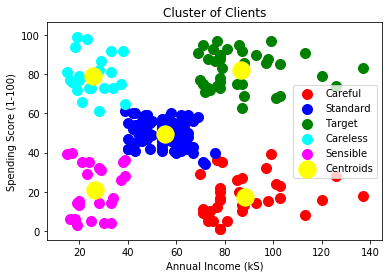

In [20]:
# visualize the first cluster (careful customers) with color of the dots = red and size = 100
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c="red", s=100, label="Careful")

# visualize the second cluster (standard customers) with color of the dots = blue and size = 100
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c="blue", s=100, label="Standard")

# visualize the third cluster (target customers) with color of the dots = green and size = 100
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c="green", s=100, label="Target")

# visualize the fourth cluster (careless customers) with color of the dots = cyan and size = 100
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], c="cyan", s=100, label="Careless")

# visualize the fifth cluster (sensible customers) with color of the dots = magenta and size = 100
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], c="magenta", s=100, label="Sensible")

# visualize the centroids with color of the dots = yellow and size = 300
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1],
            c = "yellow", s= 300, label="Centroids")

# plot the Annual Income vs Spending Score
plt.title("Cluster of Clients")
plt.xlabel("Annual Income (kS)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()